# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free-form project, you'll get a chance to practice all of these skills with the Boston Housing dataset, which contains housing values in the suburbs of Boston. The Boston housing data is commonly used by aspiring Data Scientists.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `'train.csv'`) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create two new DataFrames based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't 
    - Create two new DataFrames based on a certain split for crime rate 
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This DataFrame contains the following columns:

- `crim`: per capita crime rate by town  
- `zn`: proportion of residential land zoned for lots over 25,000 sq.ft  
- `indus`: proportion of non-retail business acres per town   
- `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
- `nox`: nitrogen oxide concentration (parts per 10 million)   
- `rm`: average number of rooms per dwelling   
- `age`: proportion of owner-occupied units built prior to 1940  
- `dis`: weighted mean of distances to five Boston employment centers   
- `rad`: index of accessibility to radial highways   
- `tax`: full-value property-tax rate per \$10,000   
- `ptratio`: pupil-teacher ratio by town    
- `b`: 1000(Bk - 0.63)^2 where Bk is the proportion of African American individuals by town   
- `lstat`: lower status of the population (percent)   
- `medv`: median value of owner-occupied homes in $10000s 
  
    
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('train.csv')
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
b          333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [10]:
df[['crim','age','tax']].describe()

,crim,age,tax
count,333.000000,333.000000,333.000000
mean,3.360341,68.226426,409.279279
std,7.352272,28.133344,170.841988
min,0.006320,6.000000,188.000000
25%,0.078960,45.400000,279.000000
50%,0.261690,76.700000,330.000000
75%,3.678220,93.800000,666.000000
max,73.534100,100.000000,711.000000


In [11]:
#1.Two new DataFrames based on your existing data, where one contains all the properties next to the Charles river, 
#  and the other one contains properties that aren't
# We can see that everything is better near the Charles river.
charles = df[df['chas'] == True]
not_charles = df[df['chas'] != True]
display(charles.describe())
not_charles.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,20.000000,20.000000,20.000000,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,255.600000,2.163972,8.500000,12.330000,1.0,0.593595,6.577750,75.815000,3.069540,9.900000,394.550000,17.38500,380.681000,11.118000,30.175000
std,75.913663,2.885734,21.830688,6.505255,0.0,0.146237,0.814341,22.808638,1.343724,8.534142,171.795005,2.22906,21.661541,7.198281,12.362204
min,143.000000,0.015010,0.000000,1.210000,1.0,0.401000,5.403000,24.800000,1.129600,1.000000,198.000000,13.60000,321.020000,2.960000,13.400000
25%,211.250000,0.200377,0.000000,6.200000,1.0,0.489000,6.111250,58.325000,2.041250,4.750000,276.750000,14.85000,377.565000,5.007500,21.700000
50%,236.000000,0.572070,0.000000,12.240000,1.0,0.528500,6.322500,86.000000,3.080050,5.000000,307.000000,17.40000,390.580000,9.735000,26.050000
75%,302.250000,3.453213,0.000000,18.100000,1.0,0.693500,6.913250,92.925000,4.095200,12.000000,468.750000,19.00000,395.240000,14.775000,37.900000
max,373.000000,8.982960,90.000000,19.580000,1.0,0.871000,8.375000,100.000000,5.885000,24.000000,666.000000,20.20000,396.900000,26.820000,50.000000


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,313.000000,313.000000,313.000000,313.000000,313.0,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,250.654952,3.436787,10.829073,11.227252,0.0,0.554815,6.245674,67.741534,3.750853,9.616613,410.220447,18.515974,358.110511,12.604728,22.295527
std,151.365227,7.544289,22.754198,7.032974,0.0,0.112555,0.693026,28.400933,2.009606,8.768386,171.014186,2.132487,88.984202,7.061663,8.746397
min,1.000000,0.006320,0.000000,0.740000,0.0,0.385000,3.561000,6.000000,1.137000,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,118.000000,0.078750,0.000000,4.950000,0.0,0.453000,5.879000,43.700000,2.132900,4.000000,281.000000,17.400000,376.700000,7.220000,17.200000
50%,245.000000,0.245220,0.000000,9.690000,0.0,0.538000,6.185000,76.500000,3.092300,5.000000,330.000000,19.100000,392.230000,11.220000,21.200000
75%,387.000000,3.678220,12.500000,18.100000,0.0,0.624000,6.563000,93.800000,5.214600,24.000000,666.000000,20.200000,396.330000,16.440000,24.700000
max,506.000000,73.534100,100.000000,27.740000,0.0,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


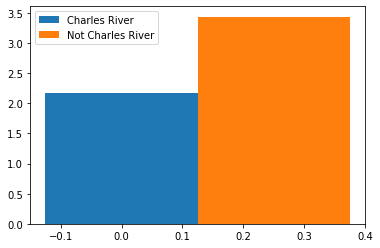

In [35]:
fig, ax = plt.subplots()
X = np.arange(1)
ax.bar(X + 0.00, charles['crim'].mean(), width = 0.25, label = 'Charles River')
ax.bar(X + 0.25, not_charles['crim'].mean(), width = 0.25, label = 'Not Charles River')
plt.legend()
plt.show()


,nox,age
0,0.538,65.2
1,0.469,78.9
2,0.458,45.8
3,0.458,54.2
4,0.524,66.6
...,...,...
328,0.585,73.5
329,0.573,69.1
330,0.573,76.7
331,0.573,91.0


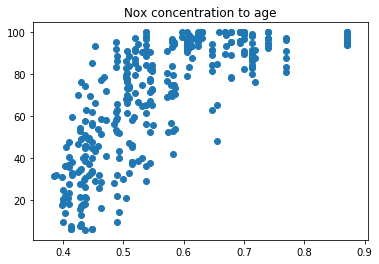

In [64]:
#See if nox poison in the air affect the age of residents.
nox_age = df[['nox', 'age']]
display(nox_age)
plt.scatter(x = df['nox'],y = df['age'])
plt.title('Nox concentration to age')
plt.show()

#We can see that there is a positive correlation in the scatter plot between the nitrogen oxide concentration to age in 
#Boston housing.

,crim,b
0,0.00632,396.90
1,0.02731,396.90
2,0.03237,394.63
3,0.06905,396.90
4,0.08829,395.60
...,...,...
328,0.17783,395.77
329,0.06263,391.99
330,0.04527,396.90
331,0.06076,396.90


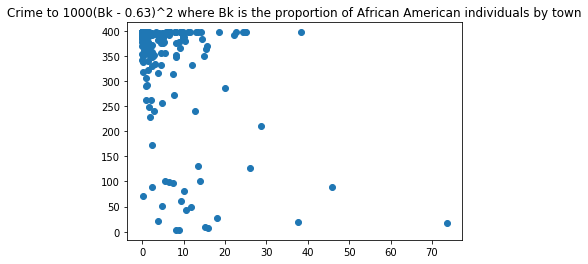

In [63]:
#Crime rate to age of people in the area
crim_age = df[['crim','b']]
display(crim_age)
plt.scatter(x = df['crim'],y = df['b'])
plt.title('Crime to 1000(Bk - 0.63)^2 where Bk is the proportion of African American individuals by town')
plt.show()

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!